# PYTHON END TERM ASSIGNMENT


## Team Members:
#### Shweta Kumari (D20035)
#### Vivaswan Jintukar (D20039)

### 1. Importing Libararies that we would be using for this Assignment.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline          
import os

### 2. Getting the current working directory

In [2]:
import os
os.getcwd()

'C:\\Users\\vivji\\Desktop'

### Q1. You will create a function named ‘Histogram’ which will take the entire dataset as input and return the histograms for all the numerical variables in your dataset as .png files in your working directory. Make sure that all the generated graphs have proper titles and axis labels.

###  Lets Load The Data

In [3]:
data=pd.read_csv('cars.csv')

### How Data looks like

In [4]:
data.shape                                   #Gives the shape of data. i.e No. of Rows and Columns in the dataset

(406, 9)

In [5]:
data.head(10)                               #Top 10 records of the dataset

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198,4341,10.0,70,US
6,Chevrolet Impala,14.0,8,454.0,220,4354,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215,4312,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225,4425,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190,3850,8.5,70,US


###  Checking for NULL values

In [6]:
data.isnull().sum()          #Gives column-wise total count of null values in the dataset

Car             0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model           0
Origin          0
dtype: int64

In [7]:
data.describe().columns  #data.describe()gives summary about the numeric columns, data.describe()columns would give the numeric columns, which we have used in the codes to give the histograms for the numeric variables.

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model'],
      dtype='object')

In [8]:
def cat_num(data):                          #Defining the function for Categorical and Numerical variable
    num=[]                                  
    categ=[]
    for i in data.columns:
        if (data[i].dtype=='object') or (data[i].nunique() <=5):
             categ.append(i)
        else:
            num.append(i)
    return (categ,num)

In [ ]:
def histogram(data):                               #defining function which makes histogram for 'data'
    cat,num=cat_num(data)                           
    for i in num:                                   # i is the individual numeric attributes of 'data'
        plt.figure(figsize=(5,5))                  #specifying the size for the plots
        sns.distplot(data[i],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))        #plotting the histogram
        name='distplot'+i
        plt.savefig(name)                          #saves the plots in the current working directory

In [ ]:
histogram(data)                                    #calling the function 

### Q2. Make an improvement on the function you have created in 1. Create a function named ‘Graphs’ which will take a dataset as input and return histograms and boxplots for all the numerical variables and bar plots for all categorical variables. 

In [ ]:
def graphs(data):
    cat,num=cat_num(data)
    for i in data.describe().columns:                      #takes all the numeric columns in the 'data'
            plt.figure(figsize=(5,5))
            sns.distplot(data[i],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
            name='distplot'+i
            plt.savefig(name)
    for i in num:                     #takes all the numeric columns in the 'data'.
            plt.figure(figsize=(5,5))
            sns.boxplot(data[i],color='pink',)
            name='boxplot'+i 
            plt.savefig(name)
    for i in cat:                   #takes all the categorical variables in the 'data'.
            plt.figure(figsize=(30,5))
            sns.countplot(data[i])
            plt.xticks(rotation=45)
            name='countplot'+i
            plt.savefig(name) 

In [ ]:
graphs(data)

### Q3. Often, we are not required to plot the graphs for all the variables in our dataset. Add an additional argument to the function in 2 named ‘var’. This will take a list containing the variable index and return the graphs for only those variables. By default, (i.e. if the list of variable index is not provided), then it must return the required graphs for all the variables in data.

In [9]:
def graphs_mod(data,var=list(range(len(data.columns)))):          
    data=data.iloc[:,var]                                 #additional argument to the original function 
    cat,num=cat_num(data)
    for i in num:                   
            plt.figure(figsize=(5,5))                     #specifying the size of the plot                  
            
            sns.distplot(data[i],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))    #plotting histogram 
            name='distplot'+i 
            plt.savefig(name) 
    for i in num:
            plt.figure(figsize=(5,5))
            sns.boxplot(data[i],color='pink')                   #plotting box plot for the numeric variables
            name='boxplot'+i 
            plt.savefig(name) 
             
    for i in cat:
            plt.figure(figsize=(30,5))
            sns.countplot(data[i])                          #plotting barchart for non-numeric variables
            plt.xticks(rotation=45)                         #rotating the labels of x axis by degrees. 
            name='countplot'+i 
            plt.savefig(name)

In [10]:
diction={}
keys=0
for i in data.columns:
    diction[keys]=i
    keys=keys+1
print('your data has following columns \n',diction)
var=[]
while True:
    col=int(input('please enter the corresponsing column number and -1 to exit'))
    if col==-1:
        break
    elif col>len(data.columns):
        print('please enter the column number within the given range')
    else:
        var.append(col)             #makes a list of columns, whose visualisation we need.
    

your data has following columns 
 {0: 'Car', 1: 'MPG', 2: 'Cylinders', 3: 'Displacement', 4: 'Horsepower', 5: 'Weight', 6: 'Acceleration', 7: 'Model', 8: 'Origin'}
please enter the corresponsing column number and -1 to exit1
please enter the corresponsing column number and -1 to exit4
please enter the corresponsing column number and -1 to exit7
please enter the corresponsing column number and -1 to exit11
please enter the column number within the given range
please enter the corresponsing column number and -1 to exit-1


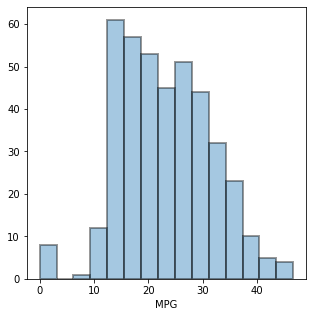

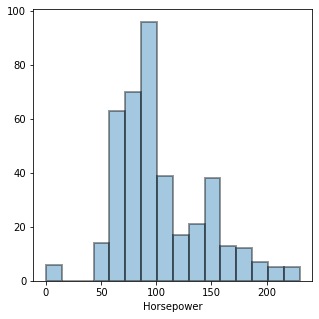

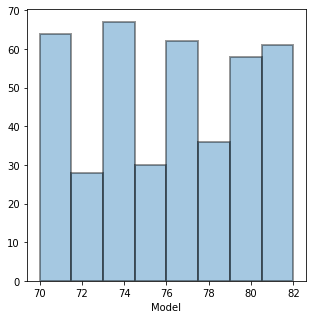

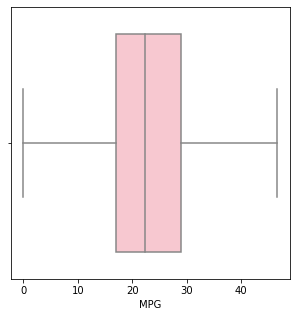

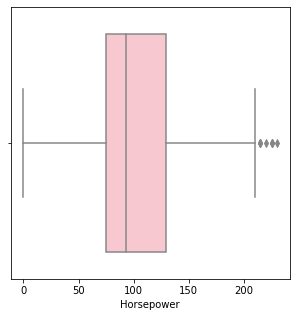

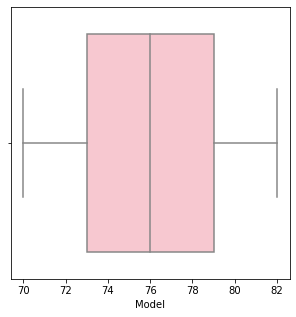

In [11]:
graphs_mod(data,var)

### Q4. Sometimes, we do not want to mess up our working directories with so many image files. Create an additional argument for the function "dir" (directory), such that the function exports all the files to that specified folder (which need not necessarily be your working directory).

### Lets load the data

In [14]:
employee=pd.read_csv('salaries.csv')

### How Data looks like

In [15]:
employee.shape                                   #Gives the shape of data. i.e No. of Rows and Columns in the dataset

(2015, 9)

In [16]:
employee.head()                    #Unless specified, gives top 5 records of the dataset.

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19


### Checking for Null Values

In [17]:
employee.isnull().sum()                            #Gives the number of null values in the individual attributes of the dataset.

Id                    0
EmployeeName          0
JobTitle             45
BasePay               0
OvertimePay          47
OtherPay            191
Benefits            235
TotalPay              0
TotalPayBenefits      0
dtype: int64

In [18]:
def cat_num(employee):                                # Defining the function for Categorical and Numerical variable.
    num=[]
    categ=[]
    for i in employee.columns:
        if (employee[i].dtype=='object') or (employee[i].nunique() <=5):
             categ.append(i)
        else:
            num.append(i)
    return (categ,num)

In [19]:
def graphs_mod_path(employee,var=list(range(len(employee.columns))),dir=os.getcwd()):
    employee=employee.iloc[:,var]
    cat,num=cat_num(employee)
    for i in num:
            plt.figure(figsize=(5,5))
            sns.distplot(employee[i],kde=False,hist_kws=dict(edgecolor="black", linewidth=2))
            name='/distplot'+i
            plt.savefig(dir+name)
                         
    for i in num:
            plt.figure(figsize=(5,5))
            sns.boxplot(employee[i],color='pink')
            name='/boxplot'+i
            plt.savefig(dir+name)
    
                         
    cat=employee.dtypes[employee.dtypes=='object'].index
    for i in cat:
            plt.figure(figsize=(30,5))
            sns.countplot(employee[i])
            plt.xticks(rotation=45)
            name='/barplot'+i
            plt.savefig(dir+name)

Your data has following columns 
 {0: 'Id', 1: 'EmployeeName', 2: 'JobTitle', 3: 'BasePay', 4: 'OvertimePay', 5: 'OtherPay', 6: 'Benefits', 7: 'TotalPay', 8: 'TotalPayBenefits'}
Please enter the corresponding column number and -1 to exit.2
Please enter the corresponding column number and -1 to exit.4
Please enter the corresponding column number and -1 to exit.7
Please enter the corresponding column number and -1 to exit.-1


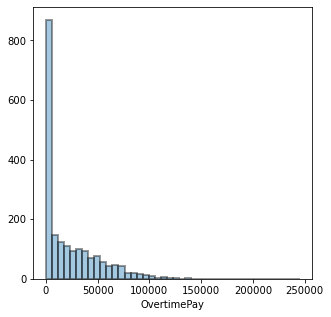

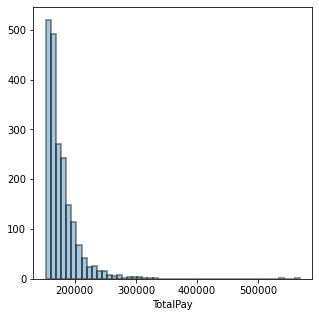

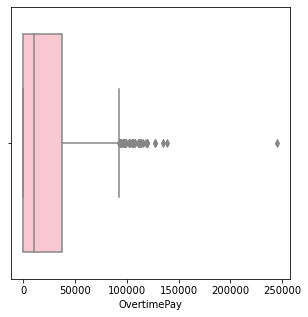

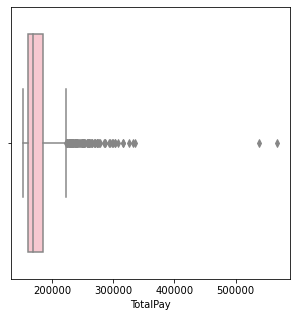

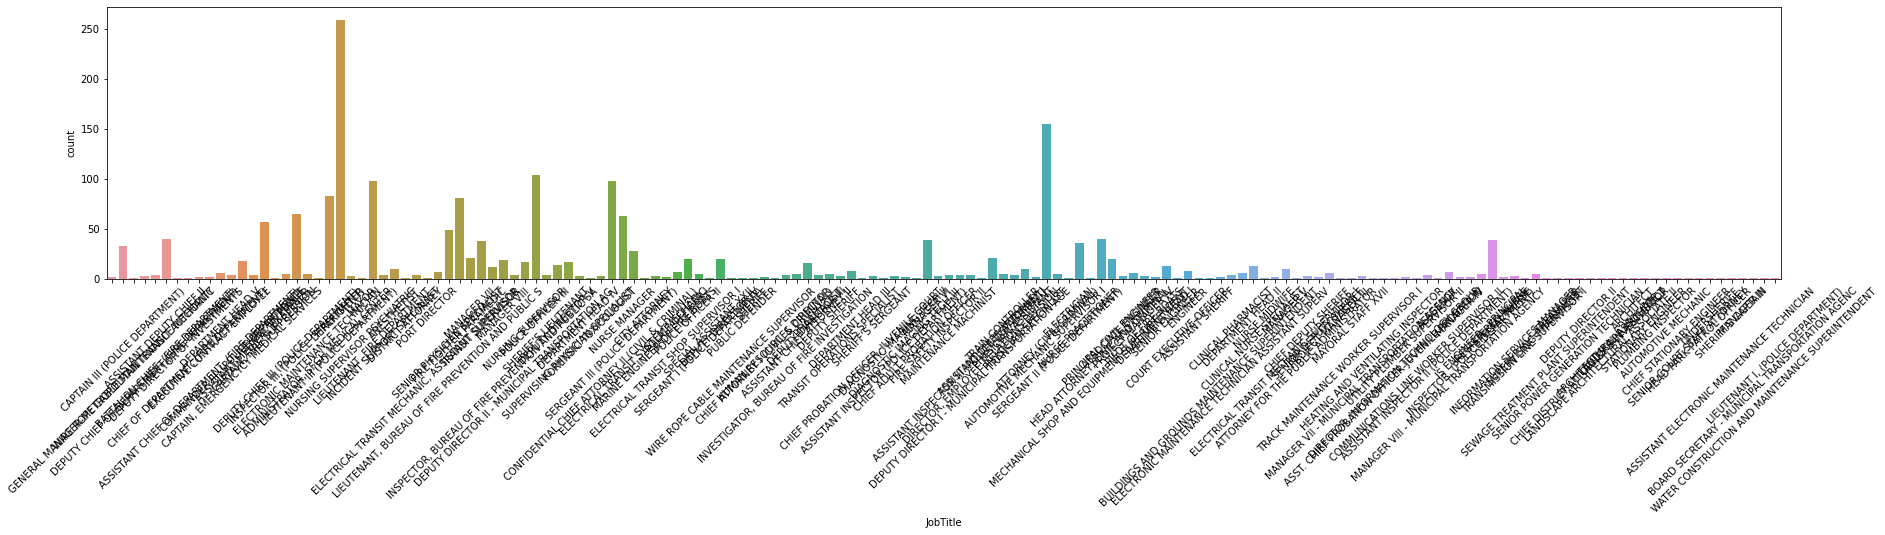

In [20]:
diction={}
dir='C:/Users/vivji/Desktop/Assignment Output'
keys=0
for i in employee.columns:
    diction[keys]=i
    keys=keys+1
print('Your data has following columns \n',diction)
var=[]
while True:
    col=int(input('Please enter the corresponding column number and -1 to exit.'))
    if col==-1:
        break
    elif col>len(employee.columns):
        print('Please enter the column number within the given range.')
    else:
        var.append(col)
graphs_mod_path(employee,var,dir)   

### Q6. New Improvements: Design a new function which you feel can help you a lot in your EDA process.


* At times our data might have quite a few null values, which affects the output of the analysis. In that case we need to do Missing Values Imputation and treat the data in order to minimise the effect of missing values.
* Here, we have tried to create  a function which will not only find those missing values in our dataset but also treat those missing values.
* Now, there are many ways for missing values treatmeant depending on the data structure. However, in most of the cases it is agreed that the missing values be replaced with mean of that variable in case of Numerical Variable and with mode of the variable in case of Categorical variable.

* Further, our data may have outliers. So, we need to analyse whether these outliers are enough to affect our output/ making the distribution skewed. So we need to treat such outliers using different techniques like **WINSORISATION - This technique replaces the outliers with the upperbound values(percentiles) and lower bound values(percentiles)**.

In [21]:
def outlier_count(employee):
    for i in employee.describe().columns:
        Q1 = employee[i].quantile(0.25)
        Q3 = employee[i].quantile(0.75)
        IQR = Q3 - Q1
        print(i,employee[employee[i]<(Q1-1.5*IQR)][i].count()+employee[employee[i]>(Q3+1.5*IQR)][i].count())
        

In [22]:
outlier_count(employee)                         #calling the function

Id 0
BasePay 21
OvertimePay 43
OtherPay 101
Benefits 0
TotalPay 103
TotalPayBenefits 103


In [23]:
def imputation(employee):
    cat,num=cat_num(employee)
    for i in num:  
        print('Number of null values in the varaible',i,employee[i].isnull().sum())
        print('Replacing these null values with mean of the variable.')
        employee[i].fillna(employee[i].mean(),inplace=True)
        
        
    for i in cat:
        print('Number of NULL values in the varaible',i,employee[i].isnull().sum())
        print('Replacing these NULL values with mode of the variable.')
        employee[i].fillna(employee[i].mode(),inplace=True)
        
def outlier_count(employee):
    cat,num=cat_num(employee)
    for i in num:
        Q1 = employee[i].quantile(0.25)
        Q3 = employee[i].quantile(0.75)
        IQR = Q3 - Q1
        print(i,employee[employee[i]<(Q1-1.5*IQR)][i].count()+employee[employee[i]>(Q3+1.5*IQR)][i].count())
        

In [24]:
imputation(employee)#calling the function

Number of null values in the varaible Id 0
Replacing these null values with mean of the variable.
Number of null values in the varaible BasePay 0
Replacing these null values with mean of the variable.
Number of null values in the varaible OvertimePay 47
Replacing these null values with mean of the variable.
Number of null values in the varaible OtherPay 191
Replacing these null values with mean of the variable.
Number of null values in the varaible Benefits 235
Replacing these null values with mean of the variable.
Number of null values in the varaible TotalPay 0
Replacing these null values with mean of the variable.
Number of null values in the varaible TotalPayBenefits 0
Replacing these null values with mean of the variable.
Number of NULL values in the varaible EmployeeName 0
Replacing these NULL values with mode of the variable.
Number of NULL values in the varaible JobTitle 45
Replacing these NULL values with mode of the variable.


# THE END